<a href="https://colab.research.google.com/github/a84597216/foodwaste/blob/main/LIS875_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1r3YSNapaRWV75qVUP31KJFHFqfvciNYF/view?usp=sharing
#US Food Surplus Dataset
# Importing relevant packages with their ali
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
import os 
from google.colab import drive

drive.mount('/content/drive/')
workdir = '/content/drive/Shareddrives/LIS 875/US Food Surplus Dataset'

Mounted at /content/drive/


In [ ]:
data = pd.read_csv(os.path.join(workdir, 'ReFED_US_State_Food_Surplus_Detail.csv'),header=3)

In [ ]:
data.head()

,year,state,sector,sub_sector,sub_sector_category,food_type,food_category,tons_supply,tons_surplus,us_dollars_surplus,...,tons_incineration,tons_land_application,tons_landfilled,tons_dumping,tons_sewer,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,2019,Virginia,Farm,Not Applicable,Not Applicable,Dry Goods,Nuts And Seeds,5.754742e+04,4589.096821,2.010058e+06,...,45.266806,0.0,223.556925,397.975736,0.0,1.018804e+04,-5.581310e+03,4606.732300,2.445454e+09,7.138270e+06
1,2019,California,Farm,Not Applicable,Not Applicable,Dry Goods,Nuts And Seeds,3.144954e+06,940275.773900,3.813334e+09,...,306.991858,0.0,10884.256950,16567.902920,0.0,2.206353e+06,-2.046480e+06,159873.169200,5.300000e+11,1.545885e+09
2,2019,California,Farm,Not Applicable,Not Applicable,Dry Goods,"Pickles, Olives, And Pickled Vegetables",1.711335e+05,3633.490173,2.824751e+06,...,0.000000,0.0,0.000000,0.000000,0.0,8.643119e+03,-8.809766e+03,-166.646648,2.074624e+09,6.055817e+06
3,2019,Arizona,Farm,Not Applicable,Not Applicable,Dry Goods,Nuts And Seeds,2.470253e+04,7385.542959,2.791735e+07,...,0.000000,0.0,87.903412,130.135182,0.0,1.733015e+04,-1.607064e+04,1259.502405,4.159787e+09,1.214240e+07
4,2019,Oklahoma,Farm,Not Applicable,Not Applicable,Dry Goods,Nuts And Seeds,4.485432e+04,7150.297501,1.235586e+07,...,8.612586,0.0,182.778222,283.341421,0.0,1.649022e+04,-1.335176e+04,3138.461560,3.958178e+09,1.155390e+07


In [ ]:
data.describe()

,year,tons_supply,tons_surplus,us_dollars_surplus,tons_waste,tons_uneaten,tons_eaten,tons_donated,tons_industrial_uses,tons_animal_feed,...,tons_incineration,tons_land_application,tons_landfilled,tons_dumping,tons_sewer,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
count,425012.000000,4.250120e+05,4.250120e+05,4.250120e+05,4.250120e+05,4.250120e+05,4.250120e+05,425012.000000,425012.000000,425012.000000,...,425012.000000,4.250120e+05,425012.000000,425012.000000,425012.000000,4.250120e+05,4.250120e+05,4.250120e+05,4.250120e+05,4.250120e+05
mean,2014.497045,1.789890e+04,1.828073e+03,8.607824e+06,1.223232e+03,1.764030e+03,3.396415e+03,64.042849,34.667868,179.545331,...,81.241937,7.802109e+01,613.433843,14.627821,112.206606,6.092373e+03,-1.256961e+01,6.079803e+03,3.207168e+08,2.940050e+06
std,2.871039,3.392885e+05,1.762167e+04,5.230784e+07,1.506417e+04,1.737580e+04,1.915785e+04,570.017803,845.466269,3699.013323,...,567.576668,5.629463e+03,2802.200136,624.378113,1489.342588,3.535838e+04,8.655344e+03,3.429564e+04,3.133951e+09,2.895966e+07
min,2010.000000,0.000000e+00,3.920000e-06,3.075686e-02,0.000000e+00,3.170000e-06,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.270000e-05,-2.061041e+06,-2.049505e+02,5.360704e-01,5.286159e-03
25%,2012.000000,2.881570e+02,2.057684e+01,1.159201e+05,1.110390e+01,1.873937e+01,1.653516e+00,0.000000,0.000000,0.021579,...,0.000000,0.000000e+00,8.776323,0.000000,0.000000,6.028399e+01,3.333045e-01,6.245765e+01,1.443145e+06,3.123228e+04
50%,2014.000000,1.532033e+03,1.128902e+02,6.083426e+05,6.519747e+01,1.040253e+02,3.091218e+01,0.571280,0.000000,1.446820,...,0.000000,0.000000e+00,51.110872,0.000000,0.000000,3.575705e+02,5.707560e+00,3.662235e+02,1.095164e+07,1.733755e+05
75%,2017.000000,6.291196e+03,6.382747e+02,3.336339e+06,3.618612e+02,5.932084e+02,8.460116e+02,7.854465,0.570239,18.204207,...,7.366785,8.209575e-02,267.888130,0.000000,4.385193,2.232765e+03,4.178561e+01,2.255579e+03,7.984329e+07,9.886806e+05
max,2019.000000,6.897356e+07,2.189269e+06,4.554126e+09,2.189269e+06,2.189269e+06,1.138532e+06,39326.116050,70259.619300,351206.293600,...,44155.837960,1.286477e+06,177127.542700,118128.249400,138913.430400,4.347218e+06,3.785158e+04,4.371112e+06,5.330000e+11,3.648782e+09


Pie Chart: Food Waste Type

In [ ]:
#state=data['state'].drop_duplicates(keep='first')
foodtype=data['food_type'].drop_duplicates(keep='first')
foodtype_waste_sum = data.groupby('food_type')['tons_waste'].transform(lambda x:x.sum()).drop_duplicates(keep='first')

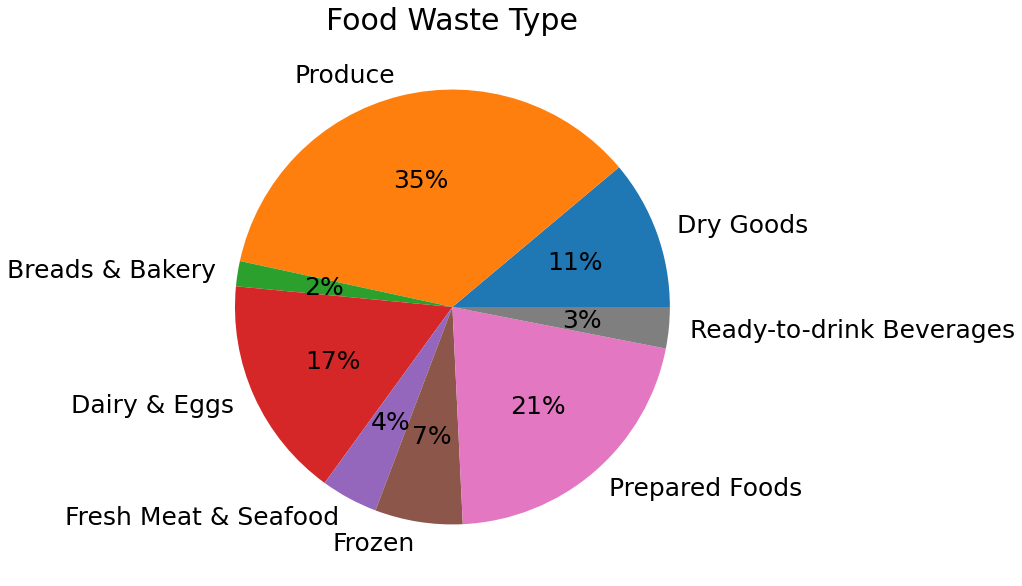

In [ ]:
# convert two array to dict without column name
# dict_from_list = dict(zip(foodtype, foodtype_waste_sum))
# convert to pd dataframe
# piechart_df = pd.DataFrame.from_dict(dict_from_list , orient= 'index')

# highlight first category
# myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0]
# plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)

# matplotlib.pyplot.pie(x, 
#                       explode=None, 
#                       labels=None, 
#                       colors=None, 
#                       autopct=None, 
#                       data=None)
# x：1 維的資料。
# explode：每個扇形的位移。型態為 array-like。
# labels：每個區塊的標題。型態為 array-like。
# colors：每個區塊的顏色。型態為 array-like。
# autopct：區塊裡面的百分比的格式。型態為 string。
# data：資料。如果傳遞資料給參數 data 時，則參數 x、explode、labels、和 colors 會是 data 的 column 名稱。

# set figure size
plt.figure(figsize=(15, 10))
plt.title('Food Waste Type', size= 30)
plt.pie(np.array(foodtype_waste_sum), labels = foodtype, autopct='%1.0f%%', textprops={'fontsize': 25})
# side label table
# plt.legend()
plt.show() 

Pie Chart: Food Waste Sector

In [ ]:
sector = data['sector'].drop_duplicates(keep='first')
sector_waste_sum = data.groupby('sector')['tons_waste'].transform(lambda x:x.sum()).drop_duplicates(keep='first')

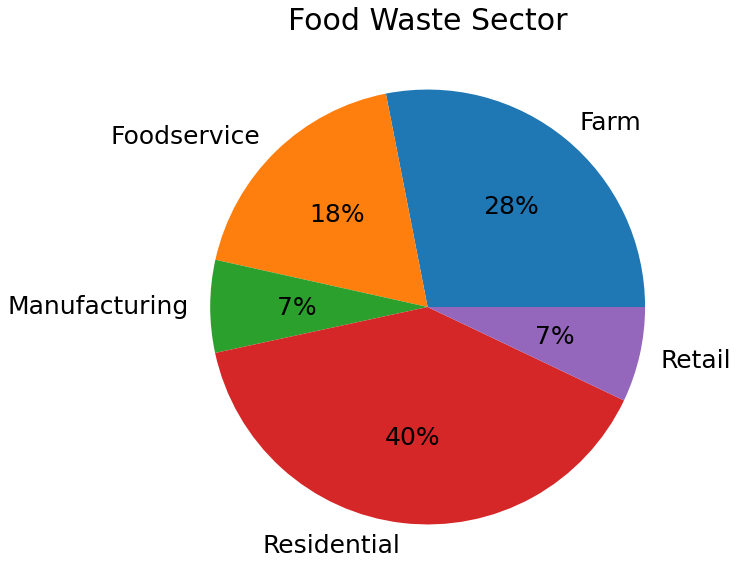

In [ ]:
# set figure size
plt.figure(figsize=(15, 10))
plt.title('Food Waste Sector', size= 30)
plt.pie(np.array(sector_waste_sum), labels = sector, autopct='%1.0f%%', textprops={'fontsize': 25})
plt.show() 

Bar: Food Waste Category

In [ ]:
# set pandas DataFrame for 4 food type: Dry Goods, Produce, Prepared Foods, Dairy & Eggs
dry_goods = data.loc[(data['food_type'] == 'Dry Goods'), ['food_category','tons_waste']]
produce = data.loc[(data['food_type'] == 'Produce'), ['food_category','tons_waste']]
prepared_foods = data.loc[(data['food_type'] == 'Prepared Foods'), ['food_category','tons_waste']]
dairy_eggs = data.loc[(data['food_type'] == 'Dairy & Eggs'), ['food_category','tons_waste']]

In [ ]:
# Pick food type sum waste and draw bar chart function
def food_waste(type_name,type_array):
  food_category = type_array['food_category'].drop_duplicates(keep='first')
  food_category_waste_sum = type_array.groupby('food_category')['tons_waste'].transform(lambda x:x.sum()).drop_duplicates(keep='first')
  # two array to dict
  dict_food = dict(zip(food_category,food_category_waste_sum))
  # sort array by tons of waste sum()
  sort_food = sorted(dict_food.items(), key=lambda x: x[1], reverse=True)
  # top 6 of array
  bar_food_category=[]
  bar_category_waste_sum= []
  for i in range(6):
    if (sort_food[i][0]) == 'Not Applicable':
      i+=1
    bar_food_category.append(sort_food[i][0])
    bar_category_waste_sum.append(sort_food[i][1])
  # draw Top 6 type bar chart
  plt.figure(figsize=(50, 25))
  plt.title('Food Waste Type in ' + type_name, size=50)
  # plt.xlabel('type',size=20)
  plt.xticks(fontsize=50)
  plt.yticks(fontsize=25)
  plt.ylabel('Total Tons of Waste (in 10 million)', size=25)
  left = np.array(bar_food_category)
  height = np.array(bar_category_waste_sum)
  plt.bar(left, height)
  plt.show()

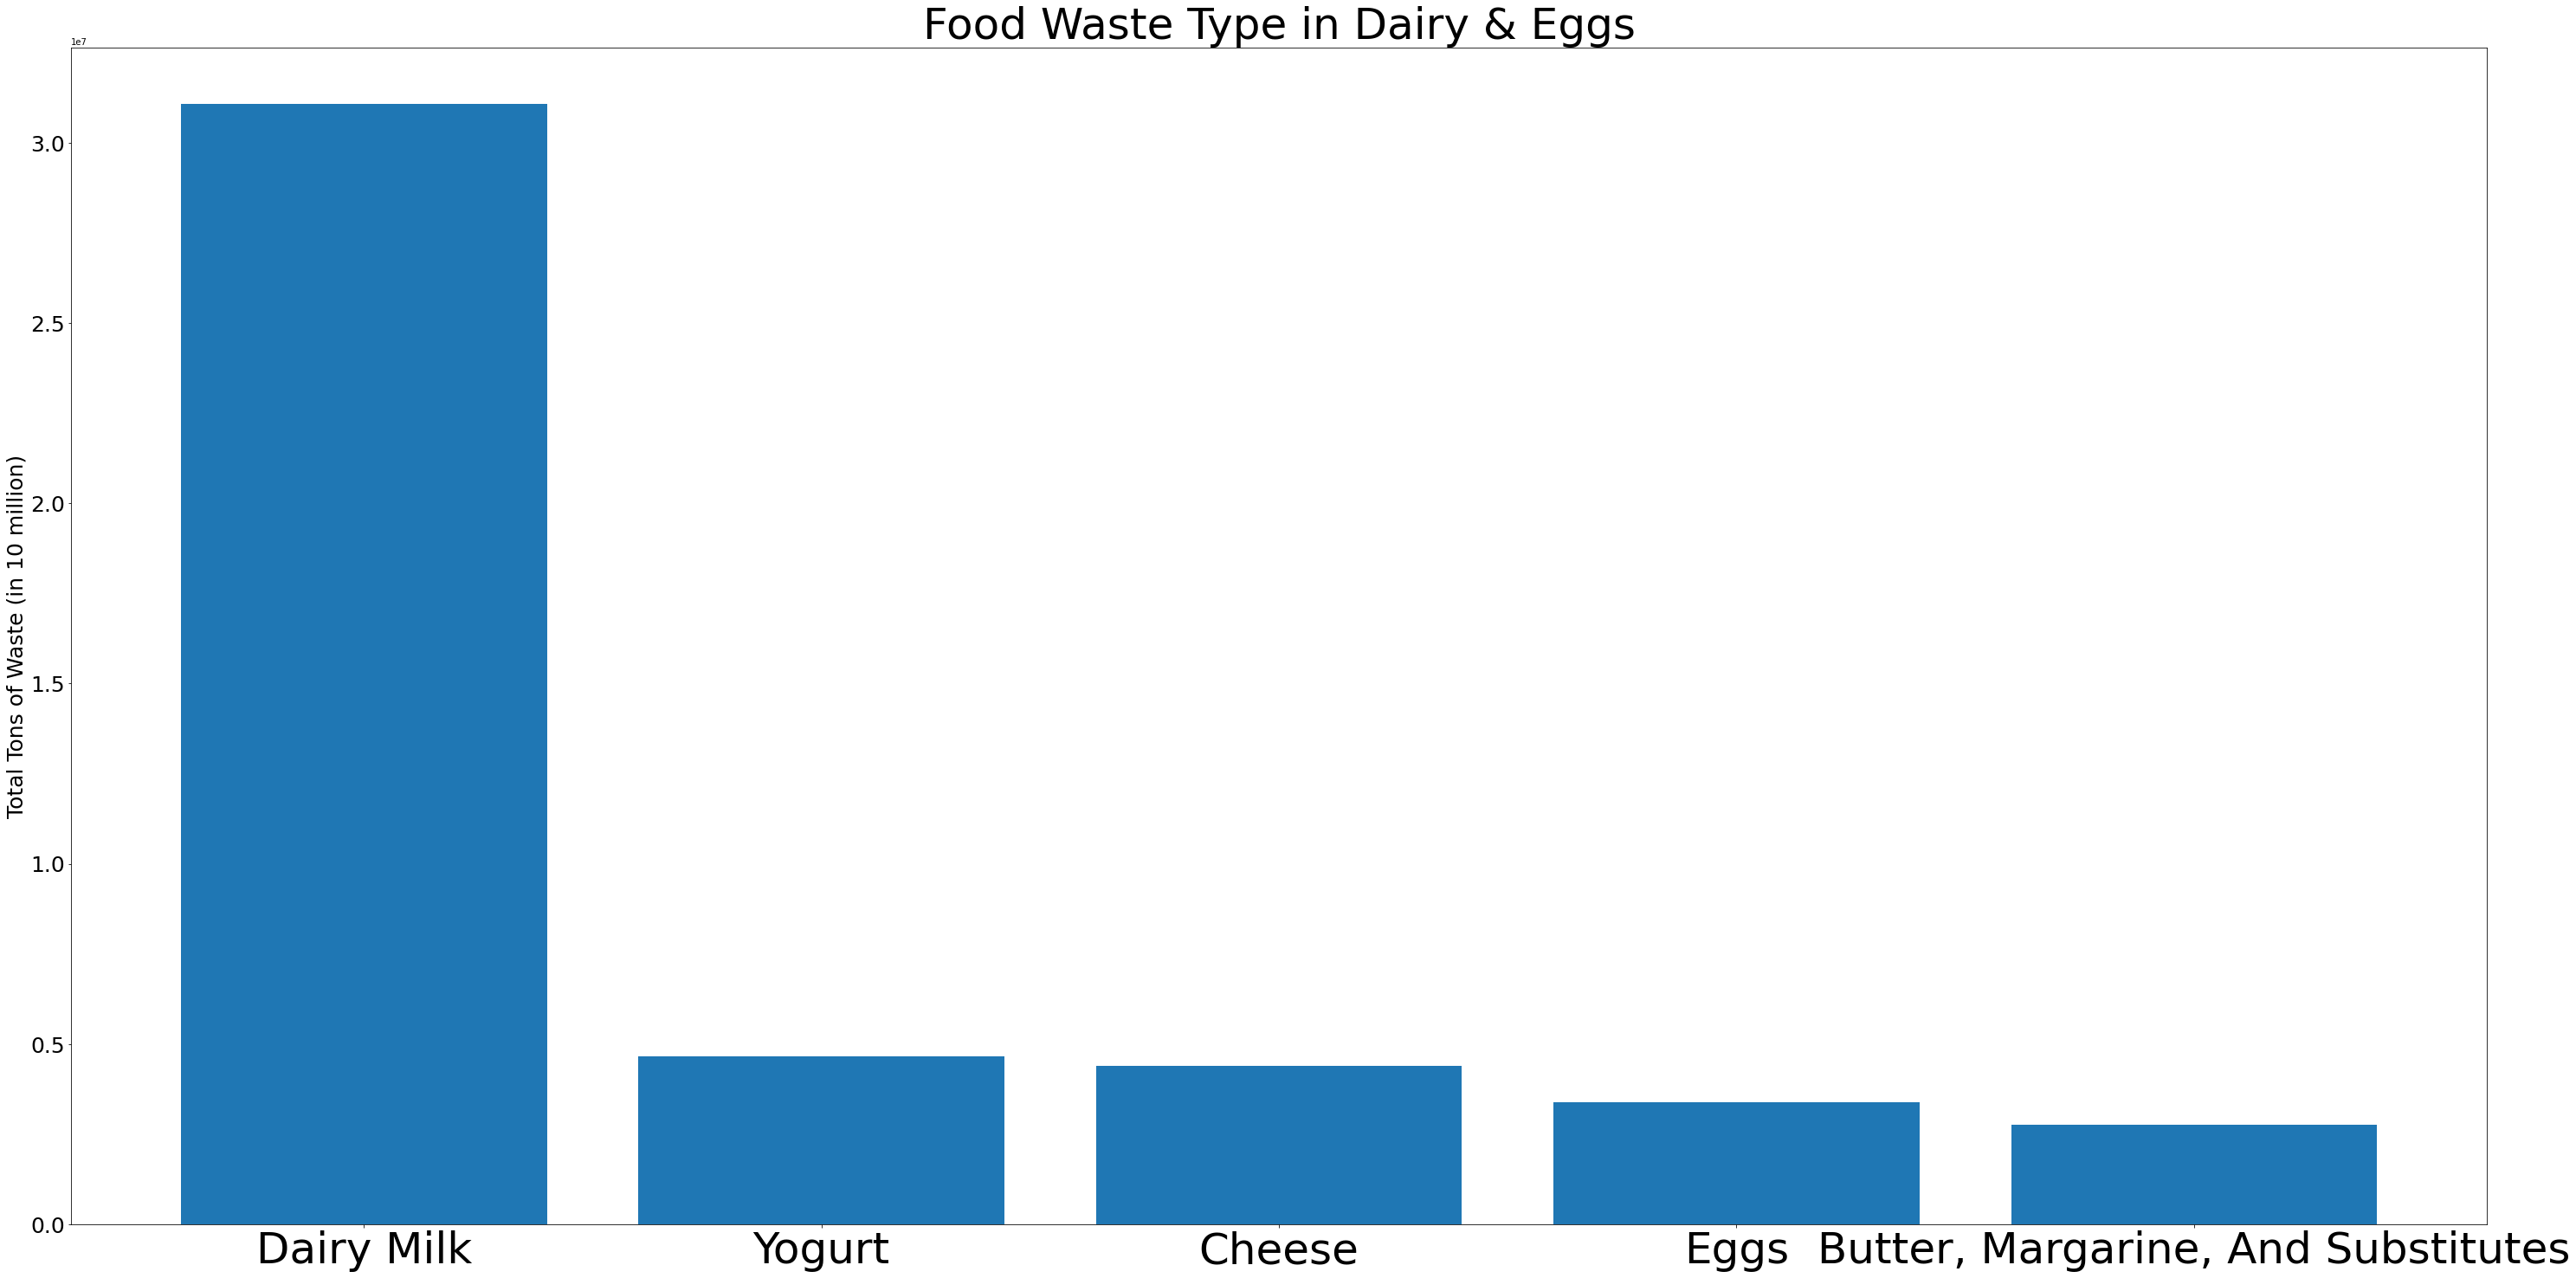

In [ ]:
# input 4 type of waste: Dry Goods, Produce, Prepared Foods, Dairy & Eggs
# food_waste('Dry Goods', dry_goods)
# food_waste('Produce', produce)
# food_waste('Prepared Foods', prepared_foods)
food_waste('Dairy & Eggs', dairy_eggs)

(Not Used) Bar: Food Type(Produce, Prepared Foods, Dairy&Eggs)/ Supply: Surplus

In [ ]:
tons_supply_surplus_produce = data.loc[(data['food_type'] == 'Produce'), (['tons_supply','tons_surplus'])]
tons_supply_surplus_preparefood = data.loc[(data['food_type'] == 'Prepared Foods'), ['tons_supply','tons_surplus']]
tons_supply_surplus_dairyeggs = data.loc[(data['food_type'] == 'Dairy & Eggs'), ['tons_supply','tons_surplus']]

tons_supply_sum, tons_surplus_sum = [tons_supply_surplus_produce['tons_supply'].sum()], [tons_supply_surplus_produce['tons_surplus'].sum()]

tons_supply_sum.append(tons_supply_surplus_preparefood['tons_supply'].sum())
tons_supply_sum.append(tons_supply_surplus_dairyeggs['tons_supply'].sum())

tons_surplus_sum.append(tons_supply_surplus_preparefood['tons_surplus'].sum())
tons_surplus_sum.append(tons_supply_surplus_dairyeggs['tons_surplus'].sum())


x = np.array(tons_supply_sum)- np.array(tons_surplus_sum)
# x
# print(tons_supply_sum,tons_surplus_sum)
# print(tons_supply_surplus_produce.sum())

In [ ]:
index = ['Produce', 'Prepared Foods', 'Dairy & Eggs']
df = pd.DataFrame({'Supply': tons_supply_sum,
                    'Consume': x}, index=index)
ax = df.plot.barh()

Waste type compare 2015 & 2016

In [ ]:
# food waste bar chart X: food waste type, Y: tons_of waste

food2015_tons_waste = data.loc[(data['year'] == 2015), (['food_type','tons_waste'])]
food2015_tons_waste_tpye = food2015_tons_waste['food_type'].drop_duplicates(keep='first')
food2015_tons_waste_tpye_sum = food2015_tons_waste.groupby('food_type')['tons_waste'].transform(lambda x:x.sum()).drop_duplicates(keep='first')

food2016_tons_waste = data.loc[(data['year'] == 2016), (['food_type','tons_waste'])]
food2016_tons_waste_tpye = food2016_tons_waste['food_type'].drop_duplicates(keep='first')
food2016_tons_waste_tpye_sum = food2016_tons_waste.groupby('food_type')['tons_waste'].transform(lambda x:x.sum()).drop_duplicates(keep='first')

In [ ]:
#test
produce = food2015_tons_waste.loc[(food2015_tons_waste['food_type'] == 'Produce'), (['tons_waste'])]
# produce_sum = produce['tons_waste'].transform(lambda x:x.sum())

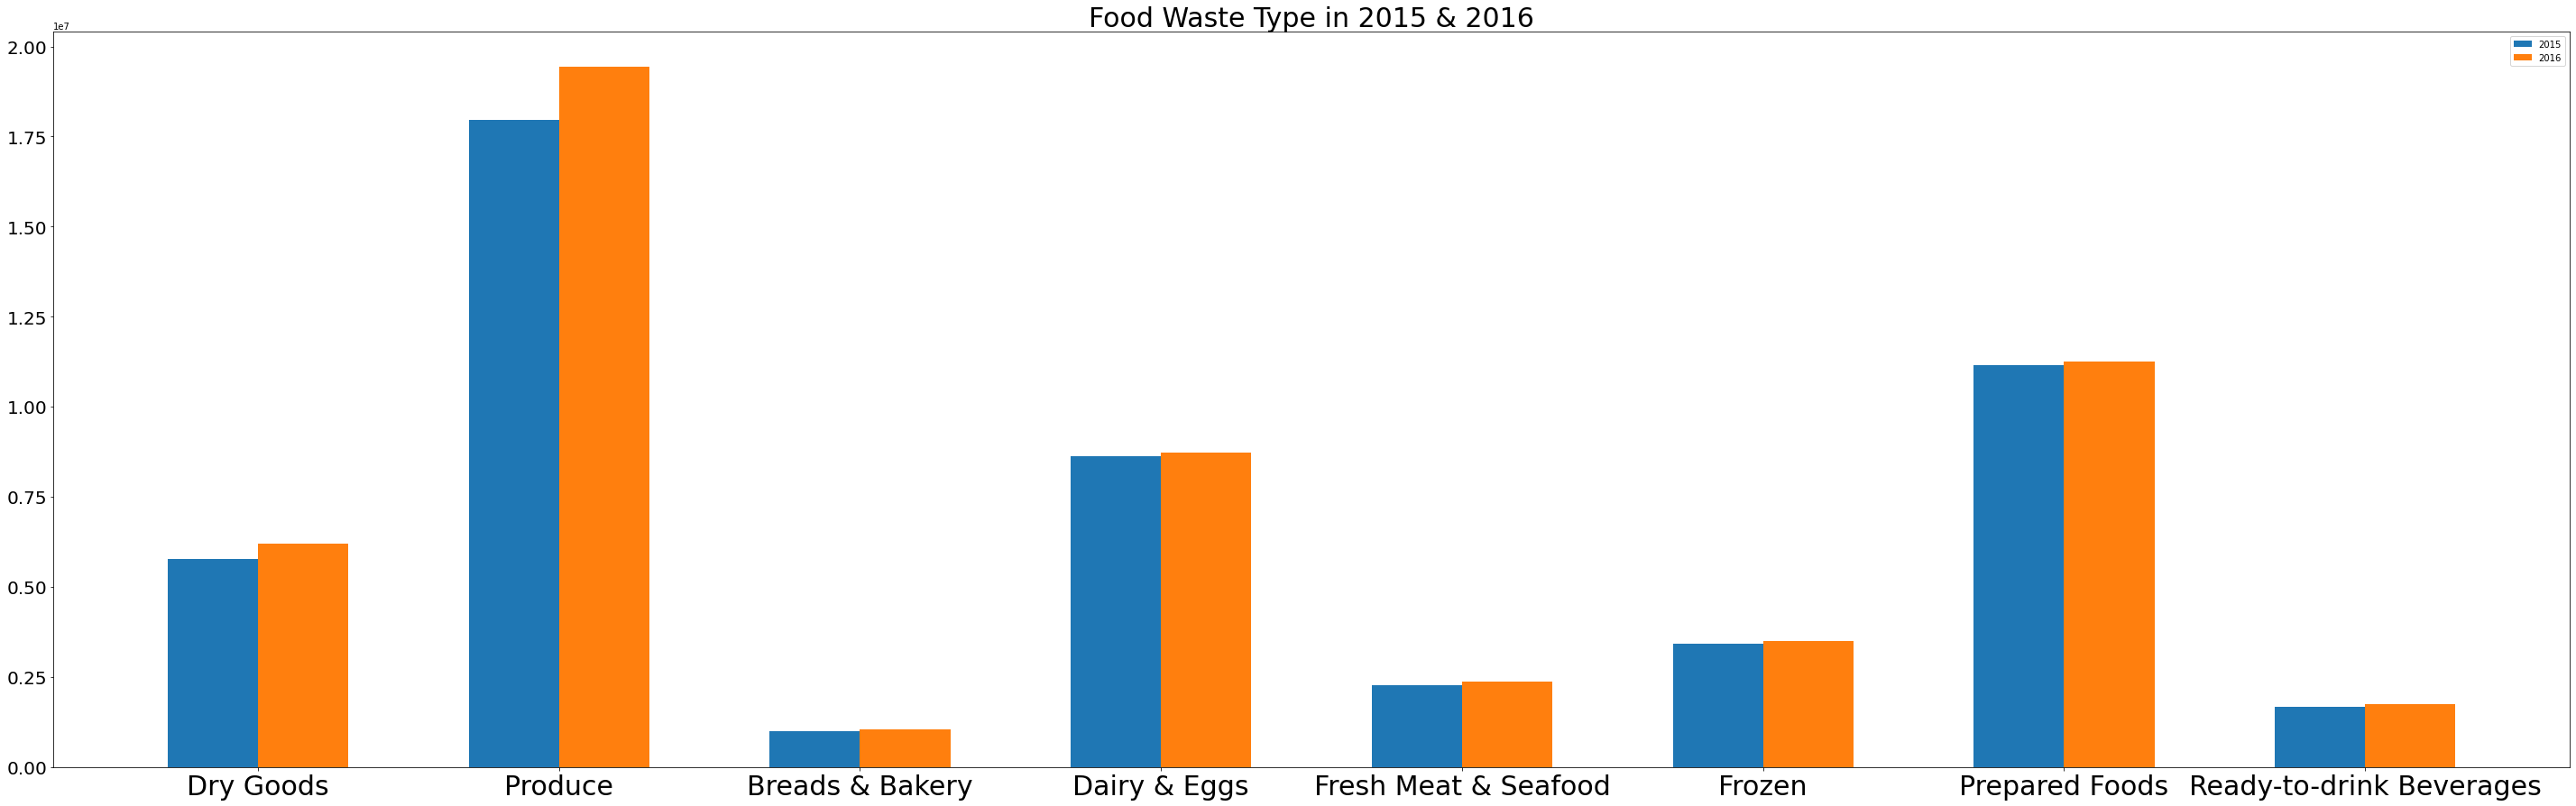

In [ ]:
index = ['Dry Goods', 'Produce', 'Breads & Bakery', 'Dairy & Eggs', 'Fresh Meat & Seafood', 'Frozen', 'Prepared Foods', 'Ready-to-drink Beverages']
# draw Top 6 type bar chart
plt.figure(figsize=(50, 15))
plt.title('Food Waste Type in 2015 & 2016', size=30)
# plt.xlabel('Type', size=20)
x = np.arange(len(index))
width = 0.3
plt.bar(x, food2015_tons_waste_tpye_sum, width, label='2015')
plt.bar(x + width, food2016_tons_waste_tpye_sum, width, label='2016')
plt.xticks(x + width / 2, index, size=30)
plt.yticks(size=20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Line Chart: Food Waste Year

In [ ]:
year=data['year'].drop_duplicates(keep='first')
year_waste_sum = data.groupby('year')['tons_waste'].transform(lambda x:x.sum()).drop_duplicates(keep='first')

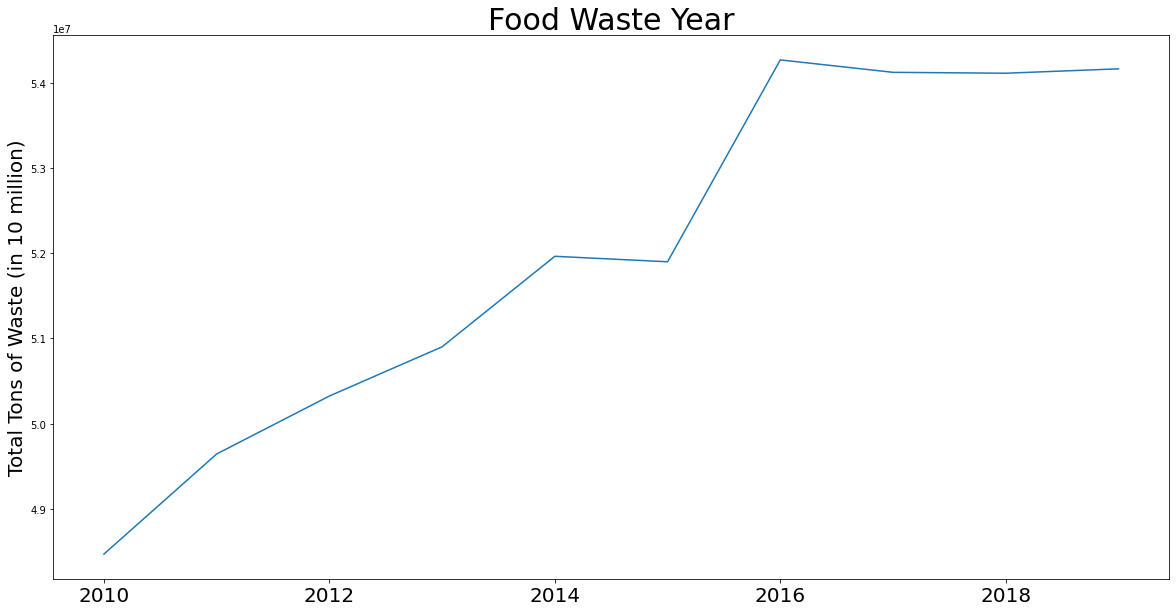

In [ ]:
# set figure size
plt.figure(figsize=(20, 20))
plt.title('Food Waste Year', size=30)
#plt.xlabel('Year', size=20)
plt.xticks(fontsize=30)
plt.xticks(fontsize=20)
plt.ylabel('Total Tons of Waste (in 10 million)', size=20)
# define data values
x = np.array(year)  # X-axis points
y = year_waste_sum  # Y-axis points
# 1e7 = 10 million
plt.plot(x, y)  # Plot the chart
plt.show()  # display